In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.manifold import TSNE
import pickle
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
#%matplotlib qt
import csv
from sklearn.metrics import f1_score
import lightgbm as lgb
import itertools
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

/Applications/anaconda3/lib/python3.6/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_9.4.1) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [2]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #print("Normalized confusion matrix")
    #else:
        #print('Confusion matrix, without normalization')
    #print(cm)
    #plt.figure()
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

def lgb_f1_score(y_hat, data):
    y_true = data.get_label()
    y_hat = np.round(y_hat) # scikits f1 doesn't like probabilities
    return 'f1', f1_score(y_true, y_hat), True

In [3]:
# features, labels and control submission
label_train = np.load("data/train_label.npy")
features_train = np.load("data/all_features_train.npy")
features_test = np.load("data/all_features_test.npy")
print(features_train.shape)
print(features_test.shape)

(38289, 1366)
(37439, 1366)


# Correlated features

In [72]:
corrcoef_matrix = np.corrcoef(features_train, rowvar=False)
corrcoef_matrix.shape
corrcoef_matrix = np.triu(corrcoef_matrix)

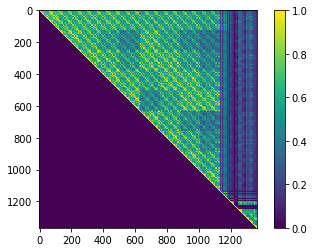

In [73]:
plt.imshow(abs(corrcoef_matrix))
plt.colorbar()

In [78]:
indx = np.argwhere(corrcoef_matrix > 0.9)



df = pd.DataFrame(indx, columns=['one', 'two'])
df = df[(df.one != df.two )]


In [81]:
df

,one,two
1,0,7
2,0,14
3,0,21
4,0,28
5,0,35
6,0,42
7,0,49
8,0,56
9,0,63
10,0,70


In [80]:
keep = [0]
for i = 


SyntaxError: invalid syntax (<ipython-input-80-bf02276facf6>, line 2)

In [ ]:
for idx, val in enumerate(indx):
    print(idx)
    if val[0]!=val[1]:
        doit = True
        for k in stay:
            if np.array_equal(np.array([val[1],val[0]]),k):
                doit=False
        if doit:
            stay.append(val)

In [ ]:
stay

In [11]:
corrvariable = []
for i in range(1366):
    A = corrcoef_matrix[:,i]
    A = np.delete(A,i)
    B = max(A)
    indB = np.argmax(A)
    corrvariable.append(B)

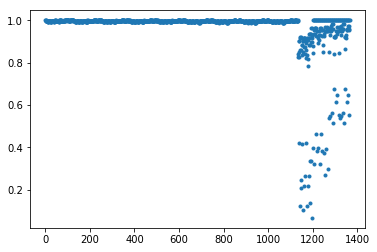

In [13]:
plt.plot(corrvariable, '.')

In [ ]:
df = pd.DataFrame(features_train)

c = df.corr().abs()

s = c.unstack()
so = s.sort_values(kind="quicksort")

# Train and validation set, and predict

In [87]:
X_train, X_test, y_train, y_test = train_test_split(features_train, label_train, test_size=0.0005, random_state=42)

In [88]:
model = lgb.LGBMClassifier(objective='binary', reg_lambda=1,n_estimators=10000)

In [89]:
model.fit(X_train, y_train, eval_set=[(X_test, y_test)], early_stopping_rounds=50, verbose=2)

Training until validation scores don't improve for 50 rounds.
[2]	valid_0's multi_logloss: 1.41391
[4]	valid_0's multi_logloss: 1.28705
[6]	valid_0's multi_logloss: 1.17159
[8]	valid_0's multi_logloss: 1.08825
[10]	valid_0's multi_logloss: 1.01733
[12]	valid_0's multi_logloss: 0.957486
[14]	valid_0's multi_logloss: 0.909057
[16]	valid_0's multi_logloss: 0.87194
[18]	valid_0's multi_logloss: 0.839843
[20]	valid_0's multi_logloss: 0.809404
[22]	valid_0's multi_logloss: 0.776153
[24]	valid_0's multi_logloss: 0.748767
[26]	valid_0's multi_logloss: 0.727366
[28]	valid_0's multi_logloss: 0.709147
[30]	valid_0's multi_logloss: 0.692383
[32]	valid_0's multi_logloss: 0.676186
[34]	valid_0's multi_logloss: 0.661661
[36]	valid_0's multi_logloss: 0.654776
[38]	valid_0's multi_logloss: 0.64041
[40]	valid_0's multi_logloss: 0.628934
[42]	valid_0's multi_logloss: 0.624961
[44]	valid_0's multi_logloss: 0.620308
[46]	valid_0's multi_logloss: 0.6178
[48]	valid_0's multi_logloss: 0.610388
[50]	valid_0's 

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=10000, n_jobs=-1, num_leaves=31, objective='binary',
        random_state=None, reg_alpha=0.0, reg_lambda=1, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [90]:
y_pred = model.predict(X_test)
print(f1_score(y_pred=y_pred, y_true=y_test, average='macro'))

0.8142857142857143


percentage per stage:  [0.09448901 0.03535499 0.44743787 0.14972955 0.27298858]
class_weight [10.58324115 28.28455285  2.23494715  6.67870855  3.66315689]
0.8142857142857143


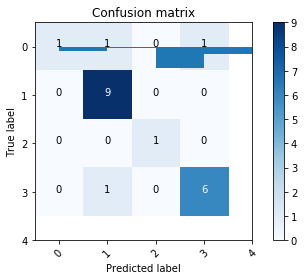

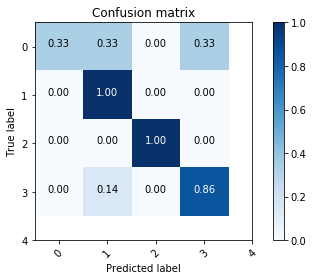

In [92]:
(n, bins, patches) = plt.hist(y_train, density=True, bins=range(5+1))
print('percentage per stage: ', n)
print('class_weight', 1/n)

y_pred = model.predict(X_test)
print(f1_score(y_pred=y_pred, y_true=y_test, average='macro'))

cnf_matrix_again = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cnf_matrix_again, ["0","1","2","3","4"])
plot_confusion_matrix(cnf_matrix_again, ["0","1","2","3","4"], normalize=True)
plt.show()

number of different stages:  5
percentage per stage train:  [ 9.45180078  3.53365196 44.74392123 14.96774531 27.30288072]
percentage per stage test:  [ 9.31648815  1.04169449 49.82237773 10.5104303  29.30900932]


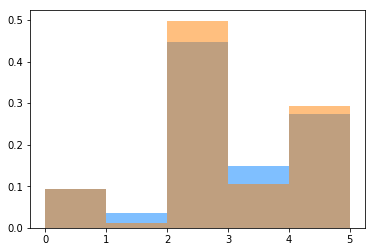

In [93]:
y_pred = model.predict(features_test)

# stages repartition in train set
nb_stages = len(np.unique(label_train))
print('number of different stages: ', nb_stages)
(n, bins, patches) = plt.hist(label_train, density=True, bins=range(nb_stages+1), fc=(0, 0.5, 1, 0.5))
print('percentage per stage train: ', n*100)
(n, bins, patches) = plt.hist(y_pred, density=True, bins=range(nb_stages+1), fc=(1, 0.5, 0, 0.5))
print('percentage per stage test: ', n*100)
plt.show()

# Hyperparameter tuning

In [110]:
# CV on 20% of the whole dataset only

features, X_test, label, y_test = train_test_split(features_train, label_train, test_size=0.8, random_state=0)
print(features.shape, len(label))

(7657, 1366) 7657


In [ ]:
random_grid = {'reg_lambda' : [0.1, 1, 5, 10, 15, 20],
               'class_weight': [None, 'balanced'],
               }

clf = lgb.LGBMClassifier(objective='binary',n_estimators=10000)
clf_random = RandomizedSearchCV(estimator = clf, scoring= 'f1_macro',
                               param_distributions = random_grid,
                               n_iter=12, cv=3,
                               verbose=6, random_state=0, n_jobs=1)

# Fit the random search model
clf_random.fit(features, label)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
[CV] reg_lambda=0.1, class_weight=None ...............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  reg_lambda=0.1, class_weight=None, score=0.6005663620682172, total=26.4min
[CV] reg_lambda=0.1, class_weight=None ...............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 26.5min remaining:    0.0s


[CV]  reg_lambda=0.1, class_weight=None, score=0.6284994940569816, total=33.3min
[CV] reg_lambda=0.1, class_weight=None ...............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 60.1min remaining:    0.0s


[CV]  reg_lambda=0.1, class_weight=None, score=0.6216378318278561, total=44.0min
[CV] reg_lambda=1, class_weight=None .................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed: 104.4min remaining:    0.0s


[CV]  reg_lambda=1, class_weight=None, score=0.6079529866006124, total=46.8min
[CV] reg_lambda=1, class_weight=None .................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed: 151.4min remaining:    0.0s


# Prepare for submission

In [94]:
res = {}
res["sleep_stage"] = y_pred
df = pd.DataFrame(res)
df.index.name = 'id'
df.head()

,sleep_stage
id,
0,2
1,0
2,2
3,4
4,4


In [95]:
y_pred[:100]

array([2, 0, 2, 4, 4, 2, 2, 3, 2, 3, 2, 2, 3, 2, 4, 4, 2, 4, 2, 2, 2, 2,
       2, 4, 2, 4, 0, 4, 4, 2, 2, 4, 4, 2, 0, 2, 2, 2, 4, 4, 2, 2, 4, 3,
       2, 2, 2, 2, 4, 2, 4, 0, 4, 2, 2, 4, 4, 0, 3, 2, 4, 4, 3, 2, 0, 2,
       3, 0, 2, 4, 3, 2, 2, 4, 4, 3, 2, 3, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 4, 2, 0, 2, 2, 2, 4, 2, 4, 4])

In [96]:
df.to_csv('test_LGBMClassifier_train995.csv')